In [1]:
import pandas
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

alloc_order = ["ArrayAtomicF", "ArrayAtomicD", "ArrayLockedF", "ArrayLockedD",
               "ArrayAlignedF", "ArrayAlignedD", "TableF", "TableD",
               "ListLocal", "Kernel"]


# Local Benchmarks

## 4K Pages

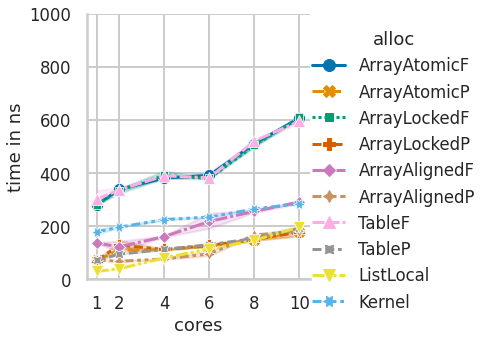

In [2]:
pgd = pandas.concat([
    pandas.read_csv("out/rand.csv"),
    pandas.read_csv("keep/kernel_rand.csv"),
], ignore_index=True)
alloc_order = ["ArrayAtomicF", "ArrayAtomicP", "ArrayLockedF", "ArrayLockedP",
               "ArrayAlignedF", "ArrayAlignedP", "TableF", "TableP",
               "ListLocal", "Kernel"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(ylim=(0, 1000))
g.set(xlabel="cores")
g.set(ylabel="time in ns")


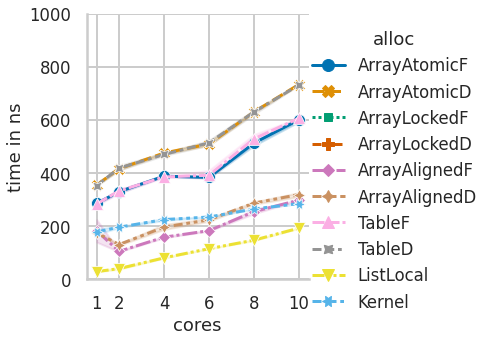

In [4]:
pgd = pandas.concat([
    pandas.read_csv("out/rand.csv"),
    pandas.read_csv("keep/kernel_rand.csv"),
], ignore_index=True)
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(ylim=(0, 1000))
g.set(xlabel="cores")
g.set(ylabel="time in ns")


## 2M Pages

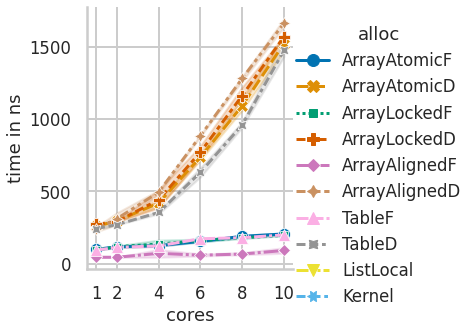

In [7]:
pgd = pandas.read_csv("out/rand_s1.csv")
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                 style="alloc", hue="alloc", markers=True,
                 style_order=alloc_order, hue_order=alloc_order)
g.set(xticks=[1, 2, 4, 6, 8, 10])
# g.set(ylim=(0, 1600))
g.set(xlabel="cores")
g.set(ylabel="time in ns")


# Server Benchmarks

## Small Pages

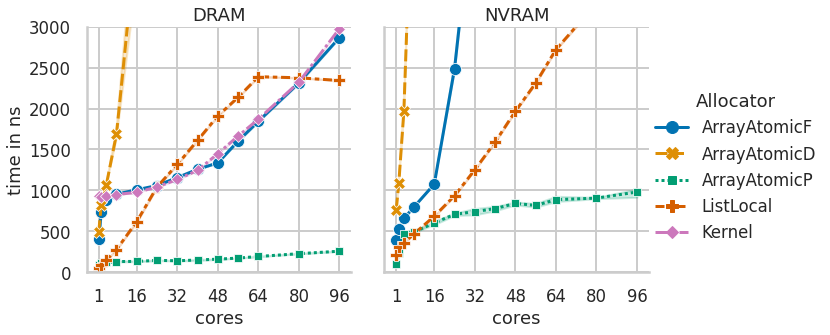

In [16]:
vd = pandas.concat([
    pandas.read_csv("remote/rand_v.csv"),
    pandas.read_csv("keep/remote/kernel_rand.csv")
], ignore_index=True)
vd["mem"] = "DRAM"

pd = pgd = pandas.read_csv("remote/rand_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
order = ["ArrayAtomicF", "ArrayAtomicD", "ArrayAtomicP", "ListLocal", "Kernel"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                col="mem",
                style_order=order, hue_order=order)

g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 3000))
# g.set(xlim=(1, 17))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.set_titles("{col_name}")


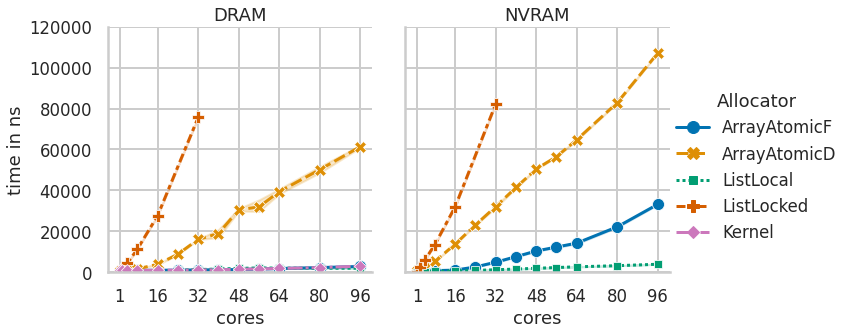

In [10]:
vd = pandas.concat([
    pandas.read_csv("remote/rand_v.csv"),
    pandas.read_csv("keep/remote/kernel_rand.csv")
], ignore_index=True)
vd["mem"] = "DRAM"

pd = pgd = pandas.read_csv("remote/rand_p.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
order = ["ArrayAtomicF", "ArrayAtomicD", "ListLocal", "ListLocked", "Kernel"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True,
                col="mem",
                style_order=order, hue_order=order)

g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 120000))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.set_titles("{col_name}")
g.savefig("../../text/thesis/plot/rand.pdf")


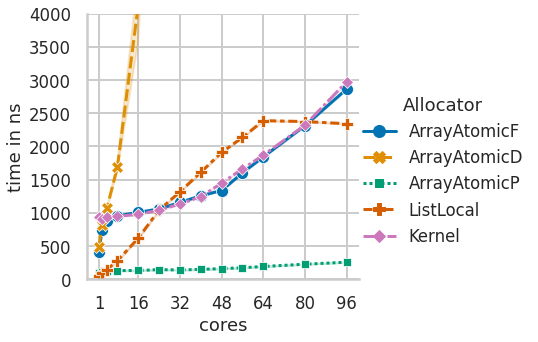

In [22]:
import itertools

pgd = pandas.concat([
    pandas.read_csv("remote/rand_v.csv"),
    pandas.read_csv("keep/remote/kernel_rand.csv")
], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
upper = ["ArrayAtomic"] #, "ArrayLocked", "ArrayAligned", "Table"]
lower = ["F", "D", "P"]
order = [u + l for (l, u) in itertools.product(lower, upper)]
order += ["ListLocal", "Kernel"]
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, aspect=1.2,
                style_order=order, hue_order=order)

g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
# g.set(xlim=(0, 17))
g.set(ylim=(0, 4000))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
# g.set_titles("{col_name}")
g.savefig("../../text/thesis/plot/rand-dram-packed.pdf")


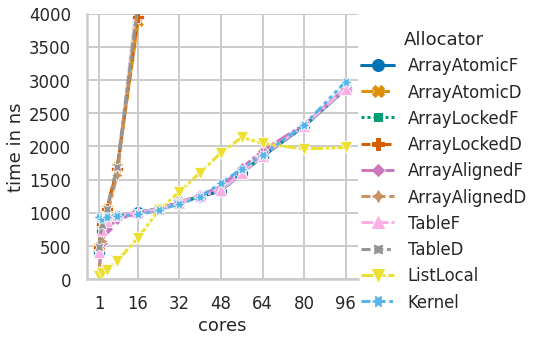

In [11]:
pgd = pandas.concat([
    pandas.read_csv("remote/rand_v.csv"),
    pandas.read_csv("keep/remote/kernel_rand.csv")
], ignore_index=True)
pgd["cores"] = pgd["x"]

# pgd = pgd.groupby(["cores", "alloc", "mem"]).min()
g = sns.relplot(data=pgd, x="x", y="get_avg", kind="line",
                style="alloc", hue="alloc", markers=True, aspect=1.2,
                style_order=alloc_order, hue_order=alloc_order)

g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
# g.set(xlim=(0, 17))
g.set(ylim=(0, 4000))
g.legend.set_title("Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
# g.set_titles("{col_name}")
g.savefig("../../text/thesis/plot/rand-dram.pdf")


## Huge Pages

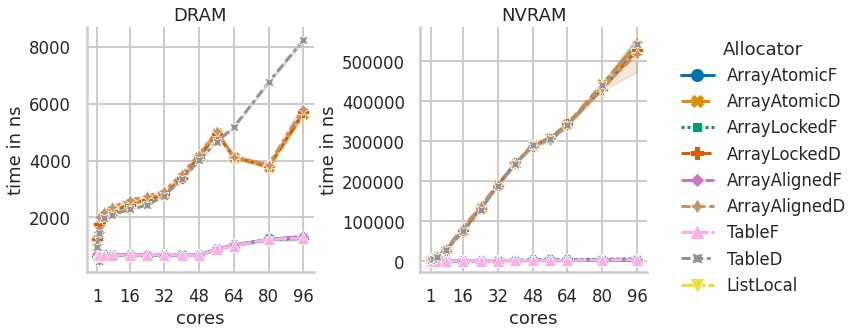

In [10]:
vd = pandas.concat([
    pandas.read_csv("remote/rand_v1.csv"),
    # pandas.read_csv("keep/remote/kernel_rand.csv")
], ignore_index=True)
vd["mem"] = "DRAM"

pd = pgd = pandas.read_csv("remote/rand_p1.csv")
pd["mem"] = "NVRAM"

pgd = pandas.concat([vd, pd], ignore_index=True)
pgd["cores"] = pgd["x"]

order = alloc_order[:-1]

g = sns.FacetGrid(data=pgd, col="mem", sharey=False,
                  aspect=1, height=5, margin_titles=True,
                  hue="alloc", hue_order=order)
g.map_dataframe(sns.lineplot, x="cores", y="get_avg", markers=True,
                hue="alloc", hue_order=order,
                style="alloc", style_order=order)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
# g.set(ylim=(0, 20000))
g.add_legend(title="Allocator")
g.set(xlabel="cores")
g.set(ylabel="time in ns")
g.set_titles(col_template="{col_name}")
# g.savefig("../../text/thesis/plot/rand1.pdf")
